# Chapter 6: Exploring COVID in Chicago 

#### Datasets: `chicago.csv`

Chicago is the third-largest city in the United States, with an estimated 2.71 living within the city's limits. This is _approximately_ the size of 19th century London (2.5 million). 

**[DISCUSS]:** Given what we know about John Snow's Grand Experiment, **how can one best measure COVID-19's impact** on the multitude of communities in Chicago? 

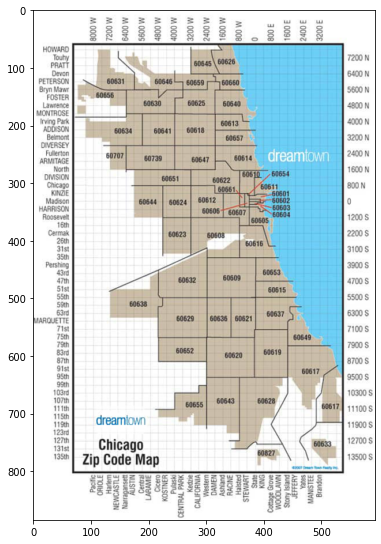

In [26]:
# In this cell, we provide a map of Chicago by zipcode. 
from PIL import Image
import matplotlib.pyplot as plt

chicago_image = Image.open('/Users/tylerskluzacek/Desktop/chicago_zip_map.jpeg')  #TODO: match to local path. 

fig = plt.figure()
ax = fig.add_axes([0.0, 0.0, chicago_image.width / 500.0, chicago_image.height / 500.0])

plt.imshow(chicago_image, interpolation = 'bilinear', cmap = 'gray')

#### Research is 'Standing on the Shoulders of Giants'
In May 2020, Kevin Credit from the Center for Spatial Data Science at the UChicago wrote "Neighborhood inequity: Exploring the factors underlying racial and ethnic disparities in COVID-19 testing and infection rates using ZIP code data in Chicago and New York". 

Fortunately at the conclusion of publishing this paper, Kevin shared his data with us! This poses one important question: 

--> **why is it important to share data in science?**

In [5]:
# We start by importing our tools
import geopandas as gpd 
import json
import os 

In [27]:
# Next we load our data into a usable format
BASE_PATH = '/Users/tylerskluzacek/Desktop'  # TODO: change path to path on Jupyter instance. 
DATA_PATH = os.path.join(BASE_PATH, 'covid_chi_xvars.geojson')
    
frame = gpd.read_file(DATA_PATH)
print(f"How many locations are in our frame?: {len(frame)}")

How many locations are in our frame?: 56


### We should always start by listing our available variables! 

In this case, however, the variables are difficult to understand based on name alone. 

What is a `FUNCSTAT10`? 

How about a `ALZFM010`?

In [33]:
# We always start by listing our available variables...
cols = frame.columns.tolist()
print(cols)

print(f"\n\n That's a lot of variables! **{len(cols)}** of them, to be exact.")

['GISJOIN', 'ZCTA5CE10', 'GEOID10', 'CLASSFP10', 'MTFCC10', 'FUNCSTAT10', 'ALAND10', 'AWATER10', 'INTPTLAT10', 'INTPTLON10', 'Shape_Leng', 'Shape_Area', 'ZIP', 'YEAR', 'POP', 'P0_44', 'P45_64', 'P65_', 'PER65', 'PERW', 'PERHIS', 'PERBLK', 'PERASN', 'PERAUTO', 'PERTRAN', 'PERPEDB', 'PERTELE', 'PERBACH', 'CASE4_11', 'CASE4_16', 'TEST4_16', 'MEDINC', 'PERNCITZ', 'PERASSIS', 'PEROFFTC', 'PERHSRV', 'PERPSRV', 'PERFOOD', 'PERCLEAN', 'PERTROCC', 'PERHU1', 'PERHU2_9', 'PERHU10p', 'PERMOBH', 'PERNOINS', 'PERNOBB', 'CASE_5_1', 'TEST_5_1', 'cases_ests', 'GISJOIN_1', 'YEAR_1', 'STUSAB', 'ZCTA5A', 'GEOID', 'NAME_E', 'ALY7E001', 'ALY7E002', 'ALY7E003', 'ALY7E004', 'ALY7E005', 'ALY7E006', 'ALY7E007', 'ALY7E008', 'ALY7E009', 'ALY7E010', 'ALY7E011', 'ALY7E012', 'ALY7E013', 'ALY8E001', 'ALY8E002', 'ALY8E003', 'ALY8E004', 'ALY8E005', 'ALY8E006', 'ALY8E007', 'ALY8E008', 'ALY8E009', 'ALY8E010', 'ALY8E011', 'ALY8E012', 'ALY8E013', 'ALZFE001', 'ALZFE002', 'ALZFE003', 'ALZFE004', 'ALZFE005', 'ALZFE006', 'ALZF

_____________________________________________________________________
Hmm, these data are fairly useless without more information. 

Thankfully, Kevin's data are accompanied by a comprehensive variable guide! 

**[DISCUSS]:** with these data in hand, which of our previously-discussed COVID-19 measurements can we access in Kevin's data? Is there anything we simply cannot measure? 

NOTE: after the data guide there is a cell where you can peek at each variable. Give it a try!  

_____________________________________________________________________

**COVID-19**

Case Rate (4/16) (per pop.) `CASER4_16` 

Testing Rate (4/16) (per pop.) `CASER4_16`

Case Rate (5/1) (per pop.) `CASER5_1`

Testing Rate (5/1) (per pop.) `TESTR5_1` 


<p>&nbsp;</p>


**Racial/Ethnic neighbourhood types**


Black non-Hispanic-Majority Neighbourhood `BLKNH` 

Hispanic-Majority Neighbourhood `HISPNH` 

White non-Hispanic-Majority Neighbourhood `WNH` 

<p>&nbsp;</p>

**Socio-economic status** 

Median household income `MEDINC`

<p>&nbsp;</p>

**Healthy, active built environments**

Population density (per m2) `POPDENS` 

Percent pedestrian and bike commuters `PERPEDB` 

Hospital accessibility score `WS__5` 

Percent food desert tracts `FDTRTPER` 

<p>&nbsp;</p>

**Vulnerability (age, occupation, household structure)**


Percent population 65+ `PER65` 

Percent healthcare service workers `PERHSRV` 

Percent housing units w/ > 1 person per room `PERCROWD`

<p>&nbsp;</p>

**Sex by Occupation for the Civilian Employed Population 16 Years and Over**

`ALY7E001`:    Total

`ALY7E002`:    Male

`ALY7E003`:    Male: Management, business, science, and arts occupations

`ALY7E004`:    Male: Service occupations

`ALY7E005`:    Male: Sales and office occupations

`ALY7E006`:    Male: Natural resources, construction, and maintenance occupations

`ALY7E007`:    Male: Production, transportation, and material moving occupations

`ALY7E008`:    Female

`ALY7E009`:    Female: Management, business, science, and arts occupations

`ALY7E010`:    Female: Service occupations

`ALY7E011`:    Female: Sales and office occupations

`ALY7E012`:    Female: Natural resources, construction, and maintenance occupations

`ALY7E013`:    Female: Production, transportation, and material moving occupations


In [36]:
# TODO: Use this cell to explore the different variables by changing the name inside. 
frame['MEDINC'].head()

0    103243
1    116250
2    111164
3    131477
4     93508
Name: MEDINC, dtype: int64

________________________________________________________________

First we want to examine the `case rate`. That is, the percentage of the population that has COVID-19. 

You'll notice that there is not already a case rate variable in Kevin's data -- this means we need to construct it ourselves!

In Python, we can do this by "declaring a function" that inputs **something** and outputs the case rate. In this case **something** is the total number of cases and the population size. 

In [38]:
def case_rate(total_cases, population): 
    cases_over_population = total_cases/population
    return cases_over_population * 100  # Why multiply it by 100? 

In [39]:
# TODO: What do we plug in to get case rate data for April 16th, 2020? 
frame['case_rate_4_16'] = case_rate(frame['CASE4_16'], frame['POP'])
# frame['case_rate_4_16'] = case_rate(???, ???)

# Next we can preview our new data to see if they pass the **smell-test**! 
frame['case_rate_4_16'].head()

0    0.238501
1         NaN
2    0.268905
3    0.709449
4    0.483255
Name: case_rate_4_16, dtype: float64

#### Check-in: which variables did you plug into your case rate function (and why)? Does your preview of the data seem reasonable? 

_______________________________________________________________________________________________

Next up, we want to consider the **testing rate**. How can we create a variable for testing rate. 

**Don't forget to preview your new data field to ensure everything looks good!** 

In [40]:
# Now we want to consider the testing rate.
# TODO: can you write a function for testing rate? HINT: it looks a LOT like the case_rate
def test_rate(???, population):
    # TODO: FILL THIS IN! 

# ANSWER: frame['testing_rate_4_16'] = (frame['TEST4_16']/frame['POP'])*100

IndentationError: expected an indented block (<ipython-input-40-698c9d4db7f5>, line 3)

In [ ]:
# Generate our new data field
frame['testing_rate_4_16'] = test_rate(???, ???)

# Preview our new data field
frame['testing_rate_4_16'].head()


#### **[DISCUSS]** How does measuring the impact of COVID-19 become difficult when only using the case_rate and test_rate? 

`case_rate` is the total number of *known* COVID19 cases. 
`testing_rate` is the total number of *known* COVID19 tests. 

Therefore, if not a lot of people are getting tested then the testing rate is low.  And if the testing rate is low, then the total number of people who we ***know*** have COVID19 is also low. 

______________________________________________________________________________________________

***ILLUSTRATIVE EXAMPLE***

Let's say there is a building containing 10 people. # TODO: TYLER add a cool picture here. 

Let's say 5 out of the 10 people have COVID.

But only 2 out of the 10 people get tested -- 1 comes back positive, 1 comes back negative. 

Therefore: 
`case_rate` = 1/10 = 10%
`testing_rate` = 2/10 = 20%

However, we know that 50% of our population has COVID19! What's a better metric for measuring this?

<p>&nbsp;</p>

***ANSWER:*** Positivity rate. **Why?**


In [41]:
# The following is our function for positivity rate. You'll notice it inputs case rate and testing rate! 
def positivity_rate(case_rate, testing_rate):
    raw_positivity = case_rate / testing_rate
    return raw_positivity * 100
# TODO: TYLER -- check with John -- should they be definining the function or just filling in vals in next cell? 

In [42]:
positivity_rate = positivity_rate(???, ???)

positivity_rate.head()

SyntaxError: invalid syntax (<ipython-input-42-8cf33daf2940>, line 1)

## Congratulations! You've just created your very own variable of interest! 

<p>&nbsp;</p>

Positivity rate enables us as researchers to see the impact of COVID, even when the total number of tests completed is low. In the upcoming exercises we will visualize and test your new variable of interest (among others!)